### Importing Libraries

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import string;

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Dataset and intial checks

In [2]:
amzn_reviews = pd.read_csv('Data/Reviews.csv')
amzn_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
print ("Rows     : " ,amzn_reviews.shape[0])
print ("Columns  : " ,amzn_reviews.shape[1])
print ("\nFeatures : \n" ,amzn_reviews.columns.tolist())
print ("\nMissing values :  ", amzn_reviews.isnull().sum().values.sum())
print ("\nMissing values :  ", amzn_reviews.isnull().sum().values)
print ("\nUnique values :  \n",amzn_reviews.nunique())

Rows     :  568454
Columns  :  10

Features : 
 ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

Missing values :   43

Missing values :   [ 0  0  0 16  0  0  0  0 27  0]

Unique values :  
 Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64


There are a total of 568,454 rows and 10 columns in the dataset. There are a total of 43 missing values - 16 in the column 'ProfileName' which will not matter much as we do not deal with this column and 27 missing values in the summary column which again should not be a problem as we have the column 'Text' to deal with.

There are 74,258 unique products id's for which the reviews are available. There are also 256K unique user id's who have provided these ~568K reviews.

Let us describe our data to check if there is anything noteworthy.

In [4]:
amzn_reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


The score varies from 1 to 5 and we observe that 75% of the reviews have a score of 5, which points towards class imbalance. The number of users who found the review helpful varies from 2 to 866.

Let us check how the different scores are distributed visually to be able to comprehend the class imbalance better.

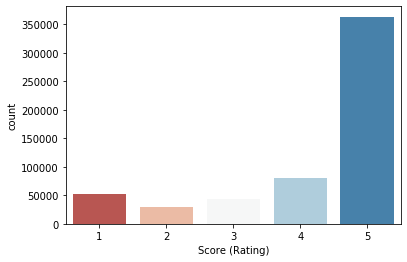

In [5]:
plt.figure()
sns.countplot(x='Score', data=amzn_reviews, palette='RdBu')
plt.xlabel('Score (Rating)');

If we consider the reviews with score 3 as neutral, then the number of positive reviews is way higher as compared to that of negative reviews.

Now, let us look at word clouds for summary of reviews with score <=2, 3, >3 to get a hang of the negative, neutral, and positive word mentions.

In [6]:
# Now let's split the data into Negative (Score is 1 or 2), Neutral (Score is 3), and Positive (4 or 5) Reviews.
negative_reviews = amzn_reviews[amzn_reviews['Score'].isin([1,2]) ]
neutral_reviews = amzn_reviews[amzn_reviews['Score'].isin([3]) ]
positive_reviews = amzn_reviews[amzn_reviews['Score'].isin([4,5]) ]

In [7]:
print(negative_reviews.shape,neutral_reviews.shape,positive_reviews.shape)

(82037, 10) (42640, 10) (443777, 10)


There are 82K negative reviews, 43K neutral reviews, and 444K positive reviews.

In [8]:
#pip install wordcloud

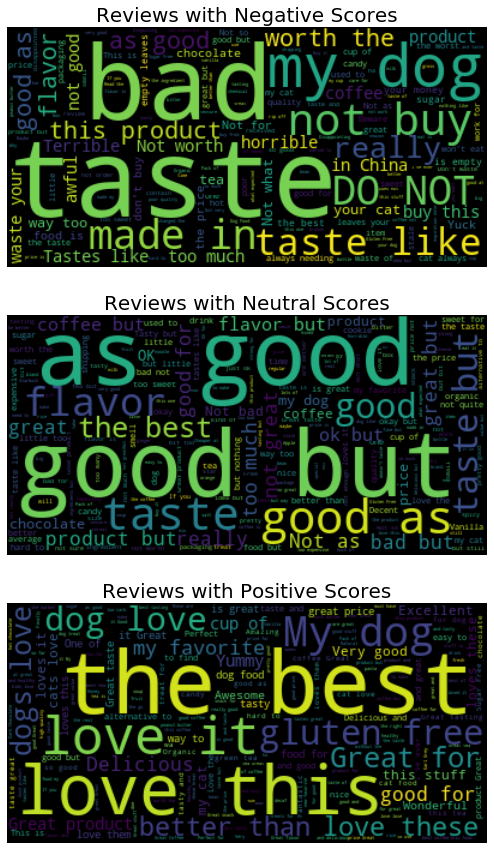

In [31]:
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
neutral_reviews_str = neutral_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Create wordclouds
wordcloud_negative = WordCloud(background_color='black').generate(negative_reviews_str)
wordcloud_neutral = WordCloud(background_color='black').generate(neutral_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

# Plot
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(311)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

ax2 = fig.add_subplot(312)
ax2.imshow(wordcloud_neutral,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Neutral Scores',fontsize=20)

ax3 = fig.add_subplot(313)
ax3.imshow(wordcloud_positive,interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Reviews with Positive Scores',fontsize=20);


The wordcloud for negative words contain some strong sentiments such as bad taste, worst, don't buy etc. For neutral scores, the reviews mostly contain 'not bad', 'good but', 'decent' etc. Positive reviews talk about how dogs/cats love the product, how the product is gluten free, and tastes delicious.

We can repeat the same by removing stopwords and check if the wordclouds have changed drastically.

In [10]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(negative_reviews))
neu_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neutral_reviews))
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(positive_reviews))

In [26]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(10,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    #plt.tight_layout(pad=0)
    plt.show()

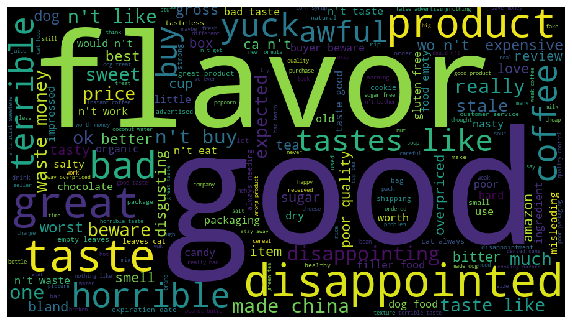

In [27]:
plot_Cloud(neg_wordcloud)

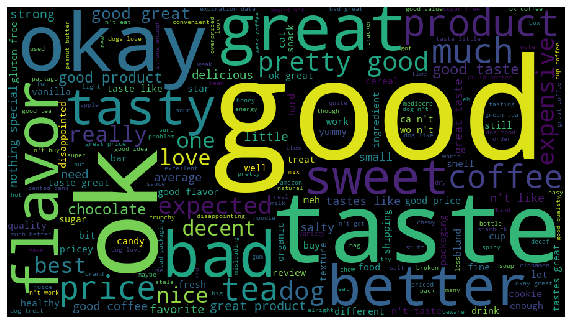

In [28]:
plot_Cloud(neu_wordcloud)

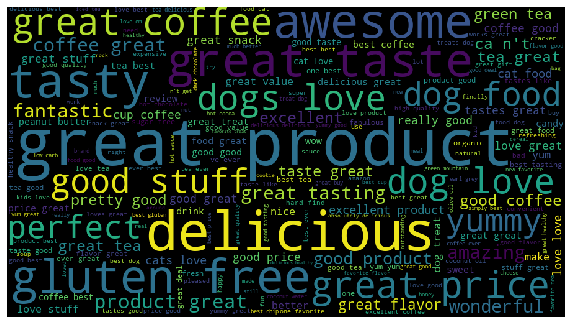

In [29]:
plot_Cloud(pos_wordcloud)

The new word clouds generated show the sentiment values more prominently as we dropped the stop words such as prepositions, articles etc. However, the main idea behind the reviews did not significantly change as seen from the previous iteration. This could be beacuse we generated on the column 'summary' and not on the column 'text'. Stop word removal from the 'text' column would have significantly changed the word clouds.